In [87]:
import matplotlib
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
import matplotlib.pyplot as plt


In [88]:

# Do some global setup so all of our graphs have the same look

def basis_activation(i, knots, k, x):
    """ calculate the value of the i-th B-spline basis function of degree k at x """
    if k == 0:
        return float(knots[i] <= x < knots[i + 1])
    else:
        denom1 = knots[i + k] - knots[i]
        denom2 = knots[i + k + 1] - knots[i + 1]
        term1 = (basis_activation(i, knots, k - 1, x) * (x - knots[i]) / denom1) if denom1 > 0 else 0
        term2 = (basis_activation(i + 1, knots, k - 1, x) * (knots[i + k + 1] - x) / denom2) if denom2 > 0 else 0
        return term1 + term2

def setup_graph():
    plt.xlim(-1, 8)
    plt.ylim(-1, 2)
    plt.xticks(range(8))
    plt.yticks([0, 1])
    plt.axhline(0, color='black', ls='--')
    plt.axvline(0, color='black', ls='--')

def setup_just_text():
    fig = plt.gca()
    fig.axes.get_xaxis().set_visible(False)                                         
    fig.axes.get_yaxis().set_visible(False)   
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.spines['bottom'].set_visible(False)
    fig.spines['left'].set_visible(False)

knots = list(range(9))
x = [x/10 for x in range(-10,100)]

image_folder_name = "generated_images"

basis_colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray"]

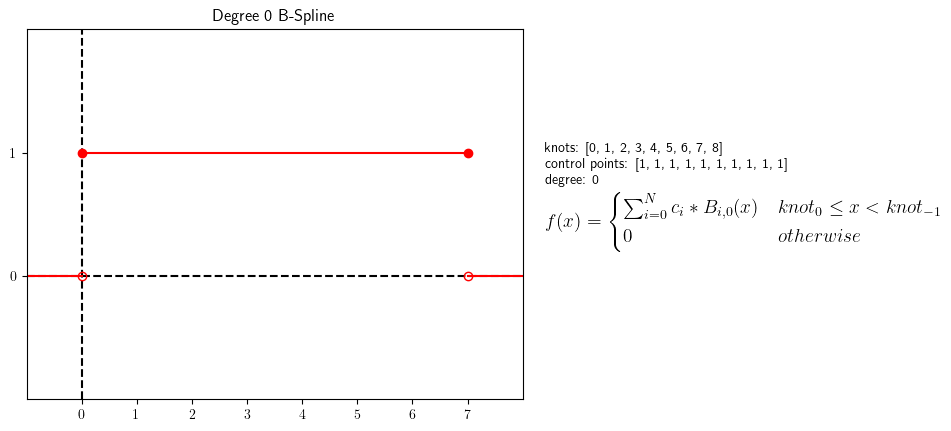

In [89]:
text_left = 8.4
text_bottom = 0.4

function_tex_string=r"$f(x) = \begin{cases} \sum_{i=0}^{N} c_i * B_{i,0}(x) &  knot_0 \leq x < knot_{-1}\\ 0 & otherwise \end{cases}$"

setup_graph()
plt.plot([0, 7], [1, 1], "ro-")
plt.plot([-2,0], [0,0], "ro-", fillstyle='none')
plt.plot([7,10], [0,0], "ro-", fillstyle='none')
plt.title("Degree 0 B-Spline")
# put text to the right of the plot
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points:    {[1]*10}\ndegree: 0",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)
# show
with open(f"{image_folder_name}/bspline_degree_0.png", "wb") as file:
    plt.savefig(file, bbox_inches='tight')
plt.show()

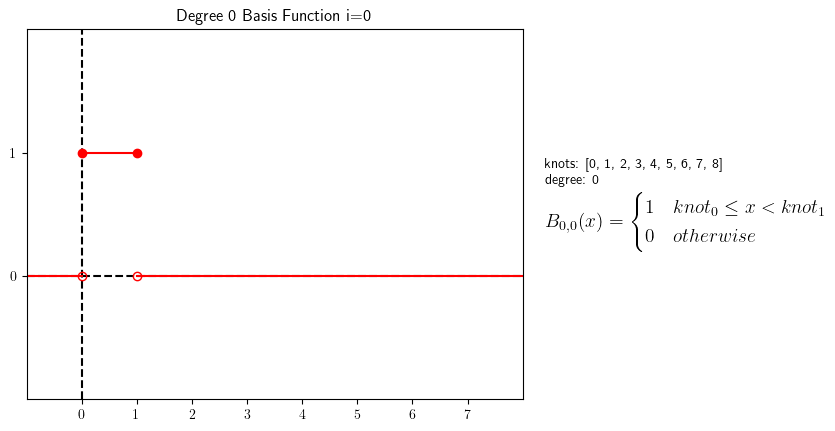

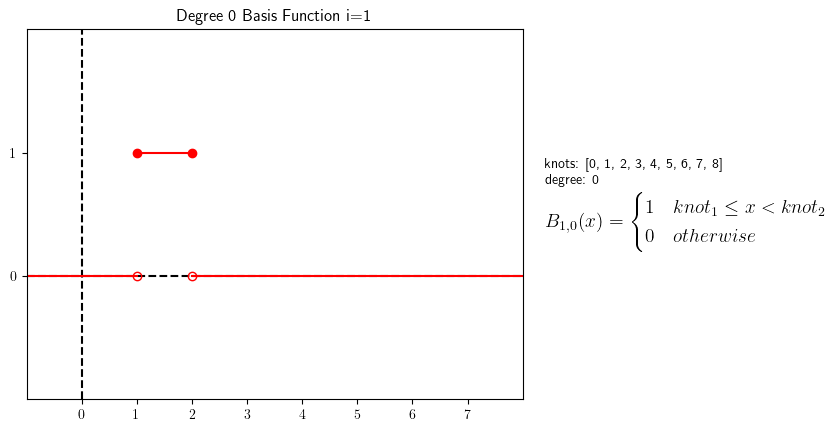

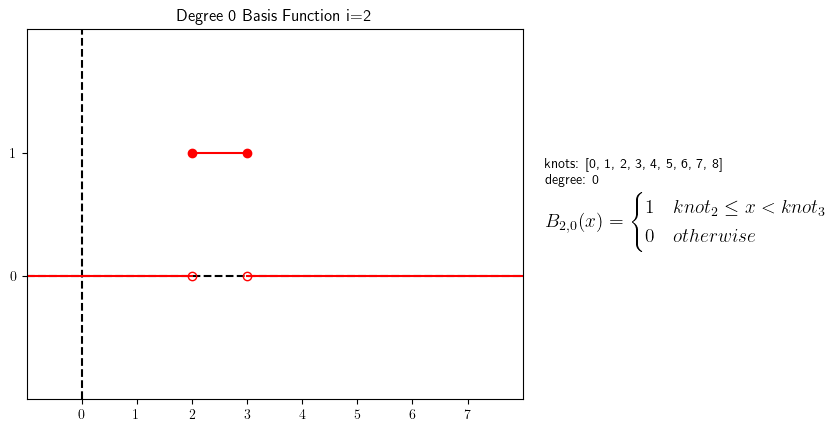

In [90]:
text_left = 8.4
text_bottom = 0.4
for i in range (3):
    function_tex_string=r"$B_{" + str(i) + r",0}(x) = \begin{cases} 1 &  knot_{" + str(i) + r"} \leq x < knot_{" + str(i + 1) + r"}\\ 0 & otherwise \end{cases}$"
    plt.title(f"Degree 0 Basis Function i={i}") 
    setup_graph()
    plt.plot([-2,i], [0,0], "ro-", fillstyle='none')
    plt.plot([i,i+1], [1,1], "ro-")
    plt.plot([i+1,12], [0,0], "ro-", fillstyle='none')
    plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ndegree: 0",)
    plt.text(text_left, text_bottom, function_tex_string, fontsize=14)
    with open(f"{image_folder_name}/degree_0_basis_{i}.png", "wb") as file:
        plt.savefig(file, bbox_inches='tight')
    plt.show()


$$
B_{i,k}(x) = 
\frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)
$$

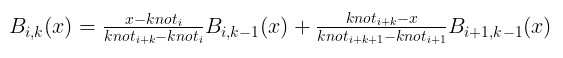

In [91]:
latex_expression = r"$B_{i,k}(x) = \frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)$"
fig = plt.figure(figsize=(3, 0.5))  # Dimensions of figsize are in inches
text = fig.text(
    x=0.5,  # x-coordinate to place the text
    y=0.5,  # y-coordinate to place the text
    s=latex_expression,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=16,
)
fig.savefig(f"{image_folder_name}/basis_formula.png", bbox_inches="tight")

setup_just_text() # unsure why this makes the difference between the text showing or not, but it does

plt.show()


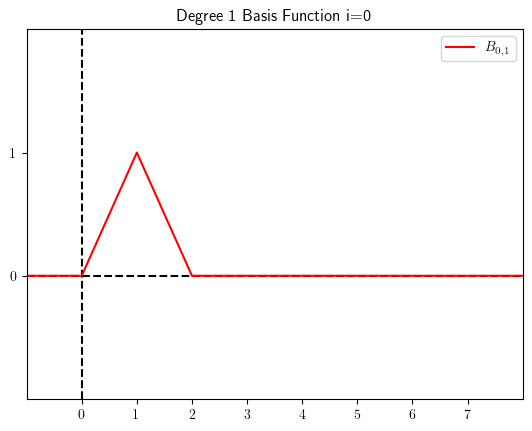

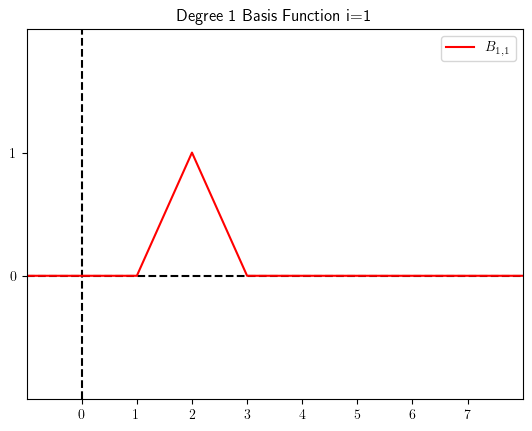

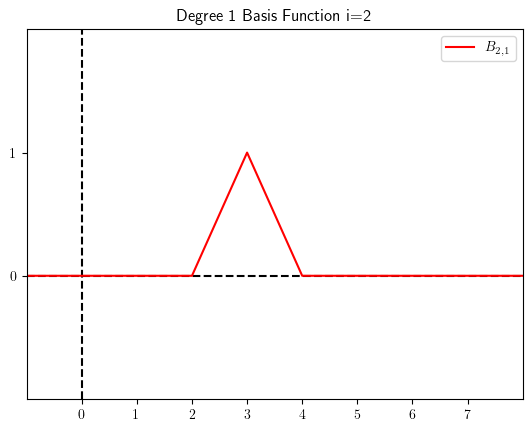

In [92]:
# Plot the first three basis functions for a degree 1 B-spline

for i in range(3):
    y = [basis_activation(i, knots, 1, x_i) for x_i in x]
    plt.title(f"Degree 1 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},1}}$", color="red")
    plt.legend()
    plt.savefig(f"{image_folder_name}/degree_1_basis_{i}.png", bbox_inches='tight')
    plt.show()

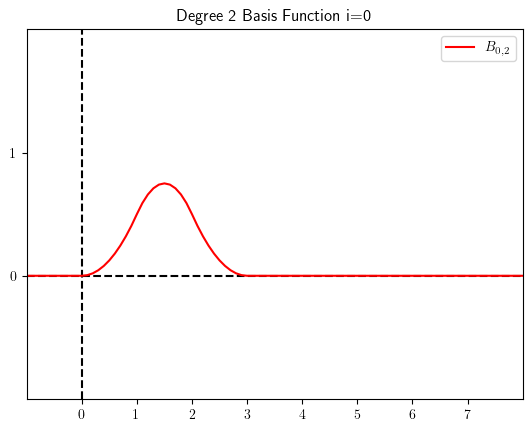

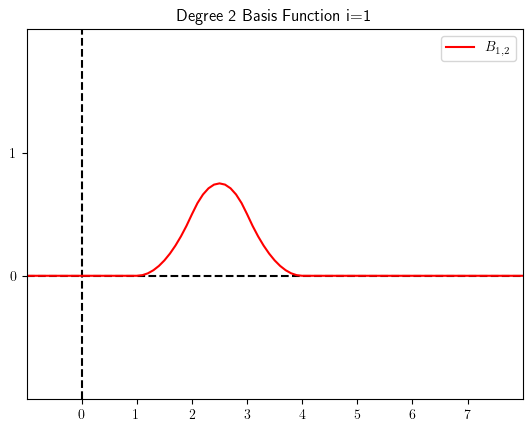

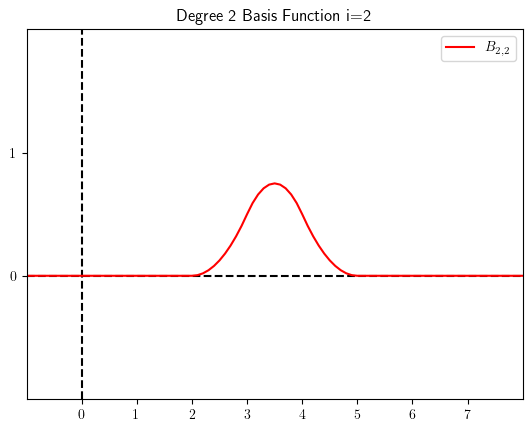

In [93]:
# Plot the first three basis functions for a degree 2 B-spline
for i in range(3):
    y = [basis_activation(i, knots, 2, x_i) for x_i in x]
    plt.title(f"Degree 2 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},2}}$", color="red")
    plt.legend()
    plt.savefig(f"{image_folder_name}/degree_2_basis_{i}.png", bbox_inches='tight')
    plt.show()

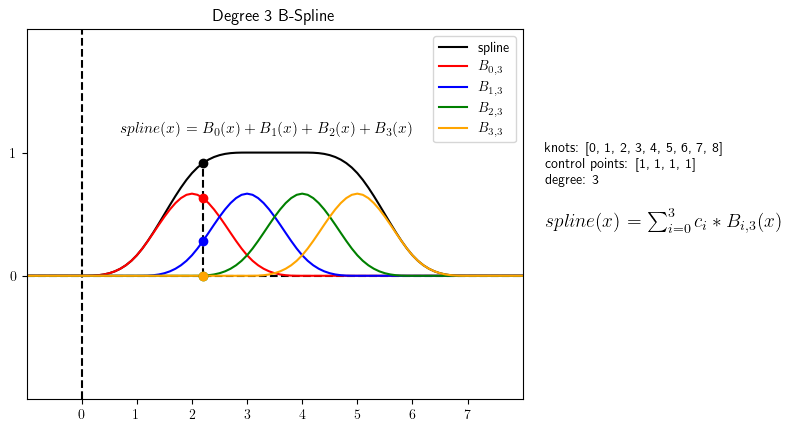

In [98]:
# Degree 3 B-spline, showing all basis activations, with control points set to 1
function_tex_string=r"$spline(x) = \sum_{i=0}^{3} c_i * B_{i,3}(x)$"

setup_graph()

basis_functions = [[basis_activation(i, knots, 3, x_i) for x_i in x] for i in range(4)]

full_spline = [sum([basis_functions[i][j] for i in range(4)]) for j in range(len(x))]
plt.plot(x, full_spline, label="spline", color="black")
for i in range(4):
    plt.plot(x, basis_functions[i], label=f"$B_{{{i},3}}$", color=basis_colors[i])

plt.legend()
plt.title("Degree 3 B-Spline")
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points: {[1]*4}\ndegree: 3",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)

# plot the color-coded points for each function at x=2
example_x = 2.2
basis_functions_at_example_x = [basis_activation(i, knots, 3, example_x) for i in range(4)]
plt.vlines(example_x, 0, sum(basis_functions_at_example_x), color="black", ls="--")

for i in range(4):
    plt.plot(example_x, basis_functions_at_example_x[i], marker='o', color=basis_colors[i])

plt.plot(example_x, sum(basis_functions_at_example_x), "ko")
plt.annotate(r"$spline(x) = B_0(x) + B_1(x) + B_2(x) + B_3(x)$", xy=(example_x, sum(basis_functions_at_example_x)), xytext=(example_x - 1.5, sum(basis_functions_at_example_x) + 0.25), fontsize=11)


plt.savefig(f"{image_folder_name}/bspline_degree_3_full.png", bbox_inches='tight')

plt.show()

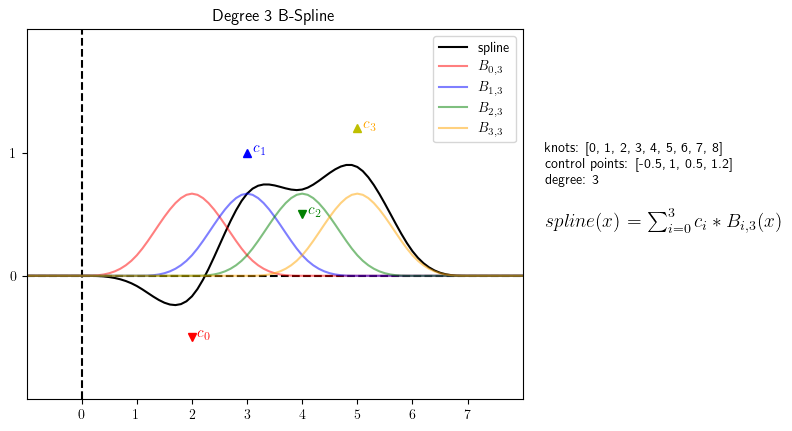

In [102]:
# Degree 3 B-spline, showing all basis activations, showing control points

control_points = [-0.5, 1, .5, 1.2]

setup_graph()
basis_functions = [[basis_activation(i, knots, 3, x_i) for x_i in x] for i in range(4)]
full_spline = [sum([basis_functions[i][j] * control_points[i] for i in range(4)]) for j in range(len(x))]

plt.plot(x, full_spline, label="spline", color="black")
for i in range(4):
    plt.plot(x, basis_functions[i], label=f"$B_{{{i},3}}$", color=basis_colors[i], alpha=0.5)

plt.legend()
plt.title("Degree 3 B-Spline")
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points:    {control_points}\ndegree: 3",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)

# plot the color-coded control points
plt.plot(knots[2], control_points[0], "rv")
plt.plot(knots[3], control_points[1], "b^")
plt.plot(knots[4], control_points[2], "gv")
plt.plot(knots[5], control_points[3], "y^")

for i in range(4):
    plt.annotate(f"$c_{i}$", xy=(knots[i + 2], control_points[i]), xytext=(knots[i + 2] + 0.1, control_points[i]), fontsize=11, color=basis_colors[i])

plt.savefig(f"{image_folder_name}/bspline_degree_3_full_with_control_points.png", bbox_inches='tight')
plt.show()